C:\Users\PIYUSH PATEL\AppData\Local\Temp\ipykernel_25944\2158510173.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  youtube_data['Country'].fillna('Unknown', inplace=True)
C:\Users\PIYUSH PATEL\AppData\Local\Temp\ipykernel_25944\2158510173.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

Summary Statistics:
          Ranking   Subscribers        Uploads         Views  \
count  100.000000  1.000000e+02     100.000000  1.000000e+02   
mean    50.500000  7.323800e+07   25681.220000  4.054367e+10   
std     29.011492  4.449087e+07   72524.113223  4.033800e+10   
min      1.000000  4.550000e+07       0.000000  0.000000e+00   
25%     25.750000  5.005000e+07     717.250000  1.964624e+10   
50%     50.500000  5.995000e+07    1891.000000  3.078494e+10   
75%     75.250000  7.447500e+07    7028.000000  4.472049e+10   
max    100.000000  3.360000e+08  433181.000000  2.772428e+11   

       Views_per_Subscriber  Views_per_Upload  Subscriber_Rank  
count            100.000000      1.010000e+02       100.000000  
mean             541.026137      3.058722e+07        50.500000  
std              298.132840      4.497774e+07        29.009055  
min                0.000000      0.000000e+00         1.000000  
25%              326.045450      2.533130e+06        25.750000  
50%          

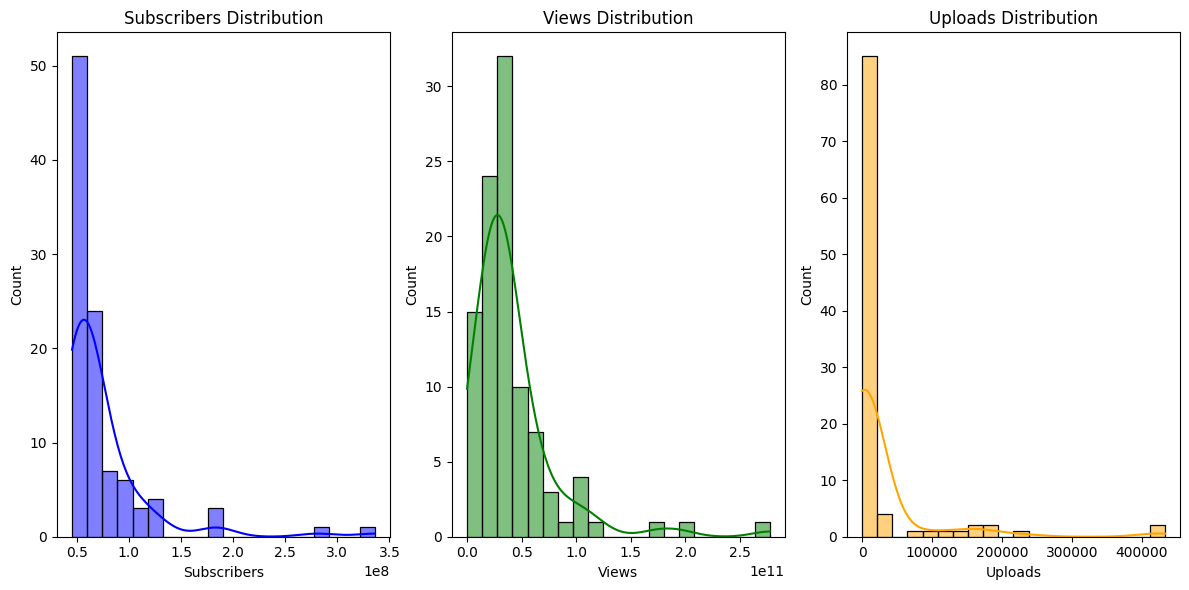

C:\Users\PIYUSH PATEL\AppData\Local\Temp\ipykernel_25944\2158510173.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


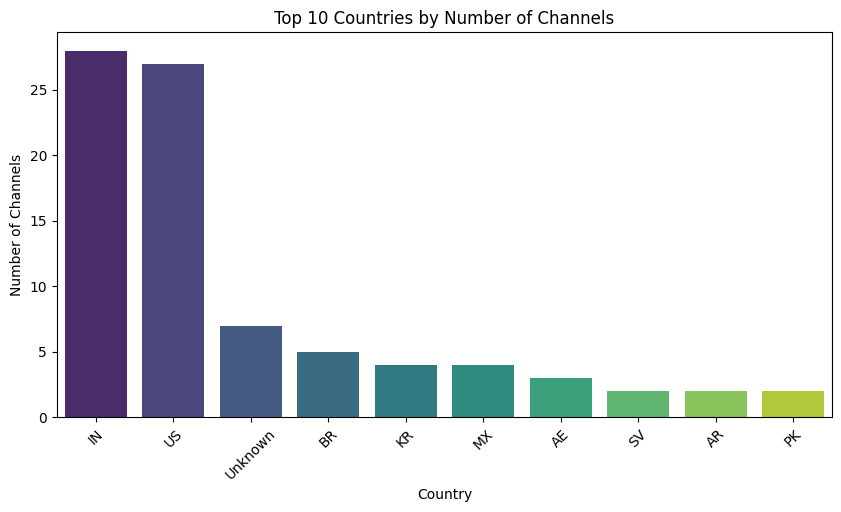

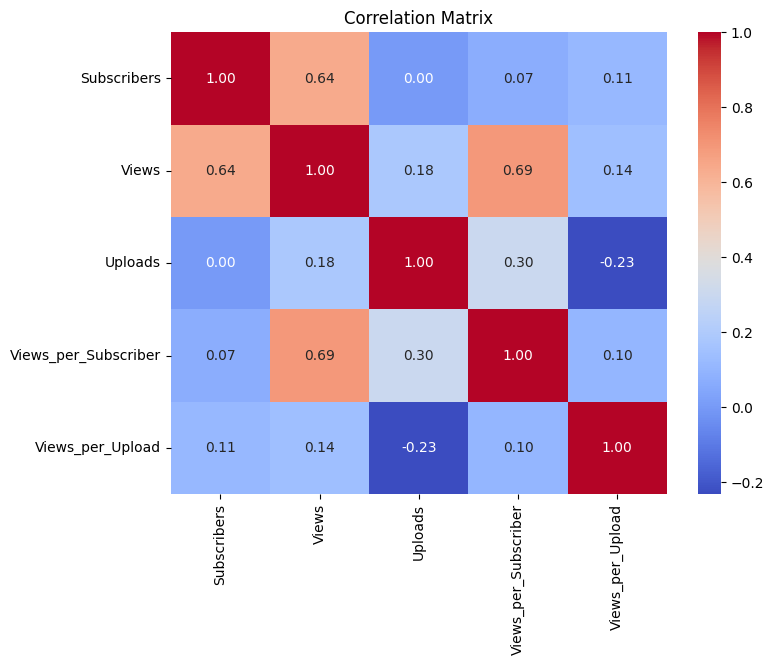

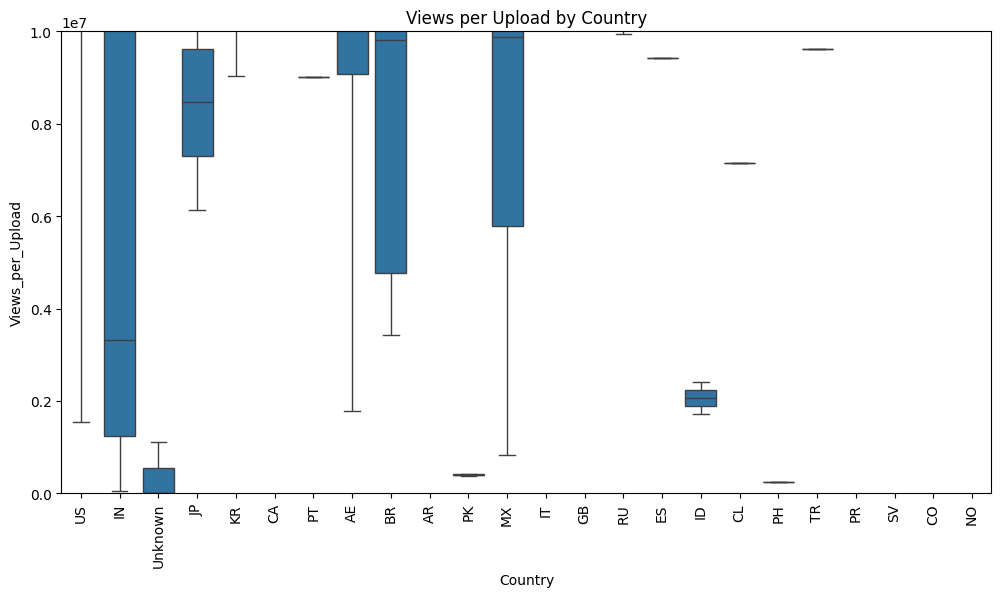

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "C:\\Users\\PIYUSH PATEL\\OneDrive\\Desktop\\YOUTUBE CHANNELS DATASET.csv"
youtube_data = pd.read_csv(file_path)

# ------------------------
# Step 1: Data Cleaning
# ------------------------

# Function to convert "M" (millions) and "B" (billions) to numeric values
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove commas
        if 'M' in value:
            return float(value.replace('M', '')) * 1e6
        elif 'B' in value:
            return float(value.replace('B', '')) * 1e9
    return float(value)

# Apply conversion to relevant columns
for col in ['Subscribers', 'Uploads', 'Views']:
    youtube_data[col] = youtube_data[col].apply(convert_to_numeric)

# Check for missing values
missing_values = youtube_data.isnull().sum()

# Handle missing values in the "Country" column
youtube_data['Country'].fillna('Unknown', inplace=True)

# ------------------------
# Step 2: Feature Engineering
# ------------------------

# Feature 1: Views per Subscriber
youtube_data['Views_per_Subscriber'] = youtube_data['Views'] / youtube_data['Subscribers']

# Feature 2: Views per Upload
youtube_data['Views_per_Upload'] = youtube_data['Views'] / youtube_data['Uploads']
youtube_data['Views_per_Upload'].replace([np.inf, np.nan], 0, inplace=True)  # Handle divide by zero

# Feature 3: Subscriber Rank (normalized rank based on subscriber count)
youtube_data['Subscriber_Rank'] = youtube_data['Subscribers'].rank(ascending=False)

# ------------------------
# Step 3: EDA
# ------------------------

# 1. Summary Statistics
print("Summary Statistics:")
print(youtube_data.describe())

# 2. Distribution of Subscribers, Views, and Uploads
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(youtube_data['Subscribers'], bins=20, kde=True, color='blue')
plt.title('Subscribers Distribution')

plt.subplot(1, 3, 2)
sns.histplot(youtube_data['Views'], bins=20, kde=True, color='green')
plt.title('Views Distribution')

plt.subplot(1, 3, 3)
sns.histplot(youtube_data['Uploads'], bins=20, kde=True, color='orange')
plt.title('Uploads Distribution')

plt.tight_layout()
plt.show()

# 3. Country-wise Analysis
plt.figure(figsize=(10, 5))
top_countries = youtube_data['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title('Top 10 Countries by Number of Channels')
plt.ylabel('Number of Channels')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

# 4. Correlation Analysis
correlation = youtube_data[['Subscribers', 'Views', 'Uploads', 'Views_per_Subscriber', 'Views_per_Upload']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 5. Boxplot of Views per Upload by Country
plt.figure(figsize=(12, 6))
sns.boxplot(data=youtube_data, x='Country', y='Views_per_Upload')
plt.title('Views per Upload by Country')
plt.xticks(rotation=90)
plt.ylim(0, 1e7)  # Focus on reasonable outliers
plt.show()

# ------------------------
# Export the cleaned and engineered data
# ------------------------
youtube_data.to_csv("C:\\Users\\PIYUSH PATEL\\OneDrive\\Desktop\\YOUTUBE CHANNELS DATASET.csv", index=False)
